In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housing-market-factors/Annual_Macroeconomic_Factors.csv
/kaggle/input/usa-housing-market-factors/Housing_Macroeconomic_Factors_US (2).csv
/kaggle/input/usa-housing-market-factors/Monthly_Macroeconomic_Factors.csv


In [121]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faryarmemon/usa-housing-market-factors")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/usa-housing-market-factors


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/usa-housing-market-factors/Monthly_Macroeconomic_Factors.csv')
df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
2,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
3,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
4,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    423 non-null    object 
 1   House_Price_Index       423 non-null    float64
 2   Stock_Price_Index       423 non-null    float64
 3   Consumer_Price_Index    423 non-null    float64
 4   Population              423 non-null    float64
 5   Unemployment_Rate       423 non-null    float64
 6   Real_GDP                423 non-null    float64
 7   Mortgage_Rate           423 non-null    float64
 8   Real_Disposable_Income  423 non-null    float64
dtypes: float64(8), object(1)
memory usage: 29.9+ KB


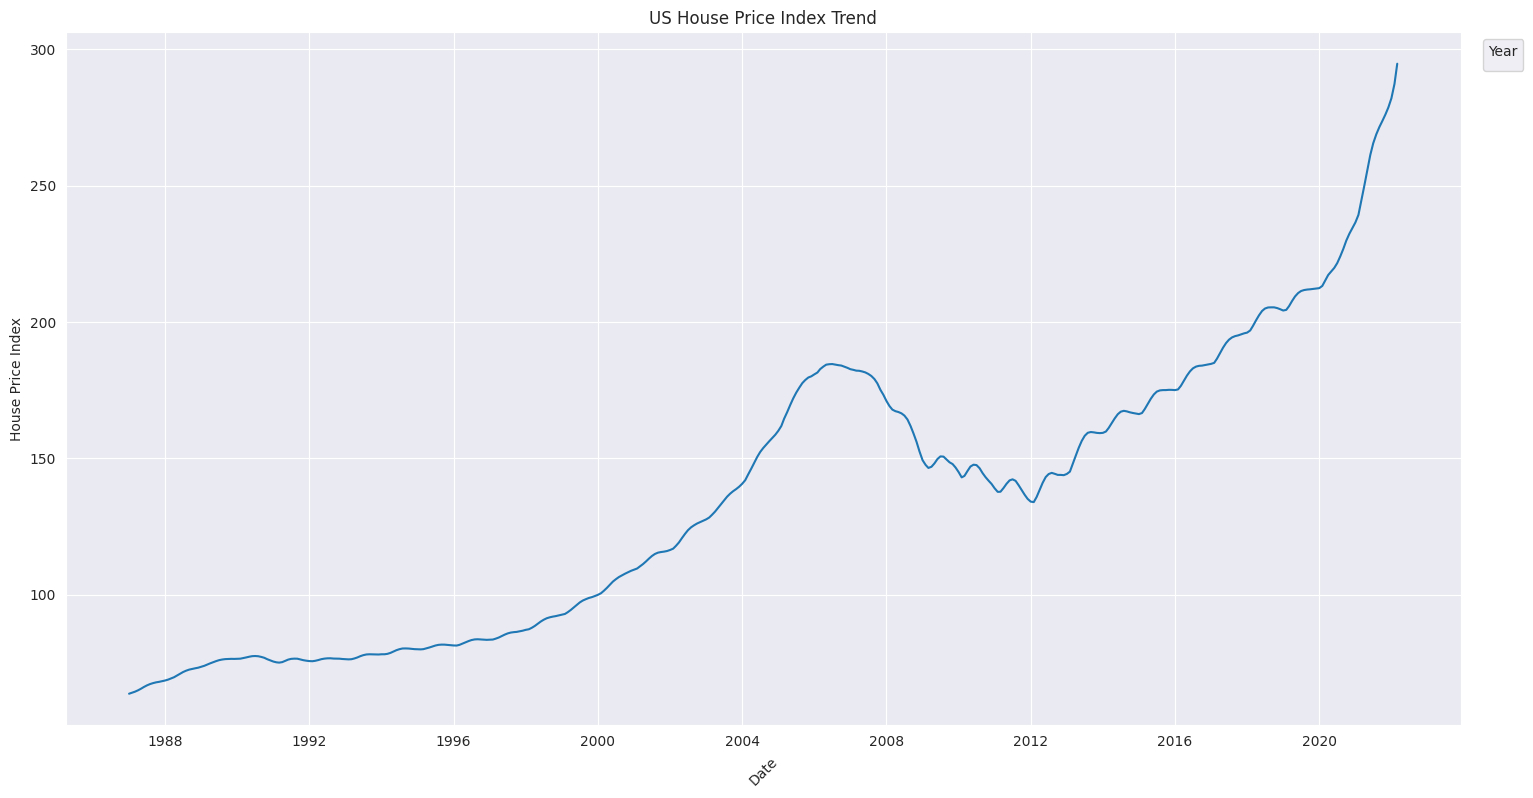

In [144]:
#EDA
sns.set_style("darkgrid")

plt.figure(figsize=(18,9))
sns.lineplot(data=df, x='Date', y="House_Price_Index")
plt.title("US House Price Index Trend")
plt.xlabel('Date', rotation=45)
plt.ylabel('House Price Index')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='best')
plt.show()
    

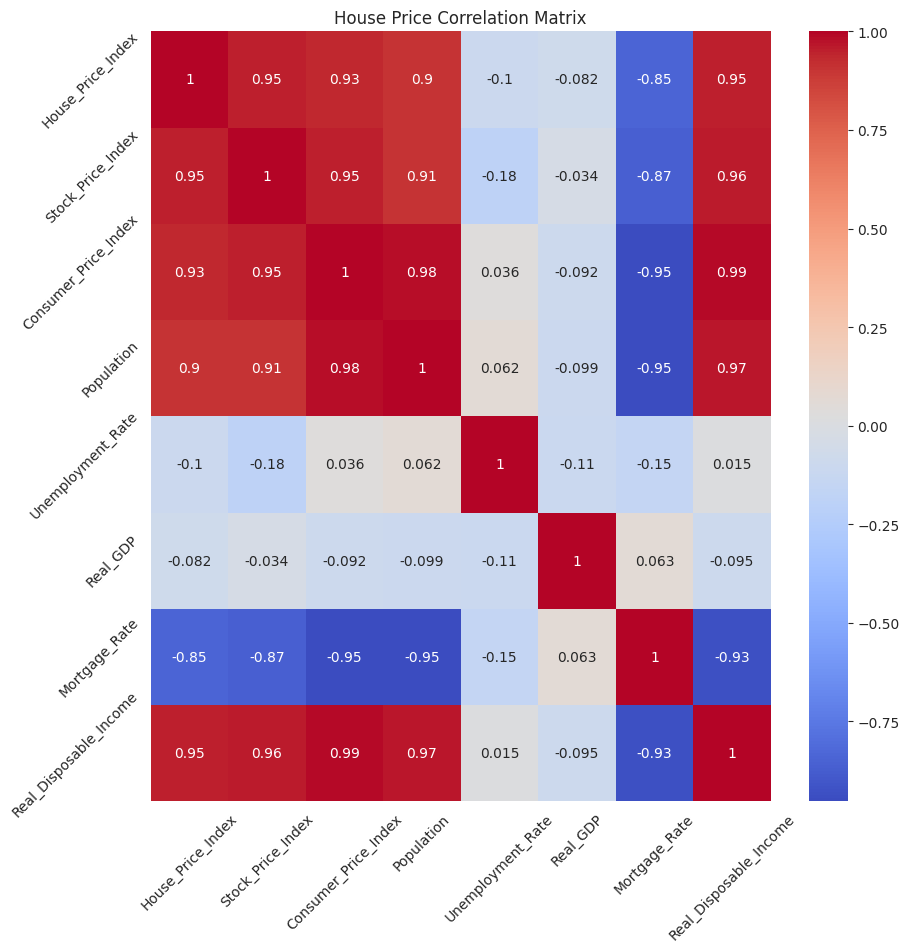

In [125]:
#EDA heat map
df_num = df.drop(['Date'], axis=1)
price_matrix=df_num.corr()
plt.figure(figsize=(10, 10)) 
ax=sns.heatmap(price_matrix, annot=True,cmap='coolwarm')
plt.title("House Price Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [126]:
#pair_matrix=df_num.iloc[:,:9]
#sns.pairplot(pair_matrix,diag_kind="kde")

In [127]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

best_predictor = None
best_r_squared = 0

date_drop = df_num.corr()['House_Price_Index'].drop('House_Price_Index')
sorted_matrix= date_drop.abs().sort_values(ascending=False)
rank = sorted_matrix.head(10).index.tolist()
print(rank)

y = df_num["House_Price_Index"]
X = df_num.drop(columns = ["House_Price_Index"])
X_con = sm.add_constant(X)
model_poly=sm.OLS(y,X_con).fit()
print(model_poly.summary())

smf_model = smf.ols(formula='House_Price_Index ~ Stock_Price_Index + Real_Disposable_Income + Consumer_Price_Index + Population + Mortgage_Rate + Unemployment_Rate + Real_GDP', data=df_num)
mod = smf_model.fit()
#print(mod.summary())

pvals = mod.pvalues
sig_terms = pvals[pvals < 0.05].index.tolist()
print(sig_terms)

sig_terms = [term for term in sig_terms if term != 'Intercept']
reduced_formula = 'House_Price_Index ~ ' + ' + '.join(sig_terms)

model_multi = smf.ols(reduced_formula, data=df_num).fit()
print(model_multi.summary())



['Stock_Price_Index', 'Real_Disposable_Income', 'Consumer_Price_Index', 'Population', 'Mortgage_Rate', 'Unemployment_Rate', 'Real_GDP']
                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     755.2
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          1.20e-231
Time:                        00:02:43   Log-Likelihood:                -1721.3
No. Observations:                 423   AIC:                             3459.
Df Residuals:                     415   BIC:                             3491.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0

In [128]:
#influence=model_multi.get_influence()
#leverage = influence.hat_matrix_diag

#residual = model_multi.resid
#residual = model_multi.resid
#residual2=residual**2

#plt.figure()
#plt.scatter(leverage,residual2, alpha=0.8)
#plt.xlabel('leverage')
#plt.ylabel('square residuals')
#plt.title('leverage vs. the square of the residual')
#plt.grid(alpha=0.3)
#plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_num.drop('House_Price_Index', axis = 1)
y = df_num['House_Price_Index']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#print(len(X_train))
#print(len(X_test))

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test, has_constant='add')
model = sm.OLS(y_train, X_train_const).fit()
train_r2 = model.rsquared
test_r2 = r2_score(y_test, model.predict(X_test_const))

print(train_r2)
print(test_r2)

0.919629111792949
0.944871035733351


In [130]:
results = []

models = [
#    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor())
]

for name, model in models:
    if name in ['SVR', 'KNN']:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2': r2,
        'MSE': mse     
    })

print(results)
        

[{'Model': 'RandomForest', 'R2': 0.9989216981803944, 'MSE': 3.769062144179991}, {'Model': 'SVR', 'R2': 0.6681409289451286, 'MSE': 1159.9697219959899}, {'Model': 'KNN', 'R2': 0.9910997948780323, 'MSE': 31.109496052705875}]


In [133]:
df['Date'] = pd.to_datetime(df['Date'])  
df = df.sort_values('Date').reset_index(drop=True)

# drop Date from features; target is House_Price_Index
X = df.drop(columns=['Date', 'House_Price_Index'])
y = df['House_Price_Index']
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(df.head(3))

Features shape: (423, 7)
Target shape: (423,)
        Date  House_Price_Index  Stock_Price_Index  Consumer_Price_Index  \
0 1987-01-01             63.735           14.97068              46.91647   
1 1987-02-01             64.134           15.86818              47.08523   
2 1987-03-01             64.470           16.48206              47.29619   

    Population  Unemployment_Rate  Real_GDP  Mortgage_Rate  \
0  153968000.0                6.6   2.41735         9.2040   
1  154123000.0                6.6   4.57724         9.0825   
2  154229000.0                6.6   3.87276         9.0350   

   Real_Disposable_Income  
0                  6159.5  
1                  6192.1  
2                  6200.0  


In [134]:
# train test split based on time

n = len(df)
test_size = int(np.ceil(0.2 * n))   # 20% for test
train_size = n - test_size

X_train = X.iloc[:train_size].copy()
y_train = y.iloc[:train_size].copy()
X_test  = X.iloc[train_size:].copy()
y_test  = y.iloc[train_size:].copy()

In [148]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

cutoff_date = "2018-01-01"
train_data = df[df['Date'] < cutoff_date].copy()
test_data  = df[df['Date'] >= cutoff_date].copy()

X_train = train_data.drop(['Date', 'House_Price_Index'], axis=1)
y_train = train_data['House_Price_Index']
X_test  = test_data.drop(['Date', 'House_Price_Index'], axis=1)
y_test  = test_data['House_Price_Index']

In [149]:
# Random forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

-2.9404318843223387
2998.6114794703944


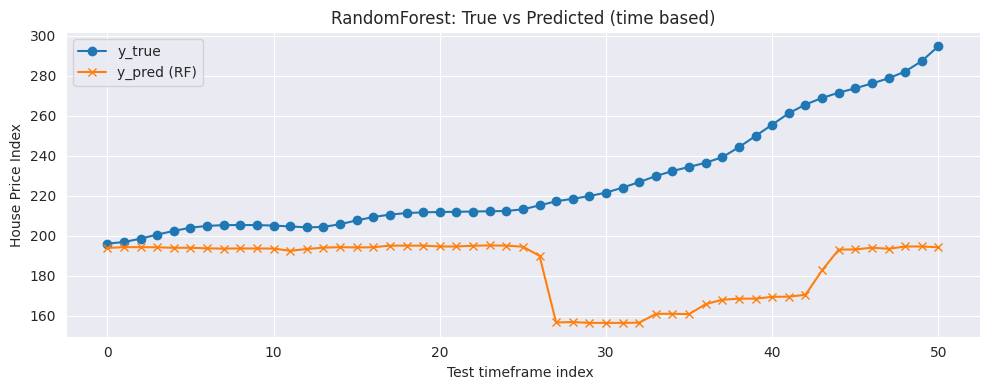

In [151]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='y_true', marker='o')
plt.plot(y_pred, label='y_pred (RF)', marker='x')
plt.title('RandomForest: True vs Predicted (time based)')
plt.xlabel('Test timeframe index ')
plt.ylabel('House Price Index')
plt.legend()
plt.tight_layout()
plt.show()

In [152]:
# Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression (OLS)")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")


Linear Regression (OLS)
 RMSE: 70.2953, MAE: 58.5559, MAPE: 24.2352%, R2: -5.4935


In [153]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Decision Tree
 RMSE: 54.9205, MAE: 42.7691, MAPE: 17.5299%, R2: -2.9636


In [154]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

print("AdaBoost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

AdaBoost
 RMSE: 59.3034, MAE: 48.6014, MAPE: 20.1311%, R2: -3.6215


In [163]:
#Gradient boost
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ada)
mape = mean_absolute_percentage_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred_ada)

print("Gradient Boost")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Gradient Boost
 RMSE: 59.3034, MAE: 48.6014, MAPE: 20.1311%, R2: -3.6215


In [164]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# scale features using training data only
scaler_svr = StandardScaler()
X_train_svr = scaler_svr.fit_transform(X_train)
X_test_svr  = scaler_svr.transform(X_test)

svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
svr.fit(X_train_svr, y_train)
y_pred_svr = svr.predict(X_test_svr)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("SVR")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

SVR
 RMSE: 92.8449, MAE: 84.6648, MAPE: 35.9434%, R2: -10.3277


In [165]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train)
X_test_knn  = scaler_knn.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2, n_jobs=-1)
knn.fit(X_train_knn, y_train)
y_pred_knn = knn.predict(X_test_knn)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("KNN")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")


KNN
 RMSE: 53.8972, MAE: 43.5345, MAPE: 18.0141%, R2: -2.8173


In [158]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression")
print(f" RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4%}, R2: {r2:.4f}")

Linear Regression
 RMSE: 53.8972, MAE: 43.5345, MAPE: 18.0141%, R2: -5.4935


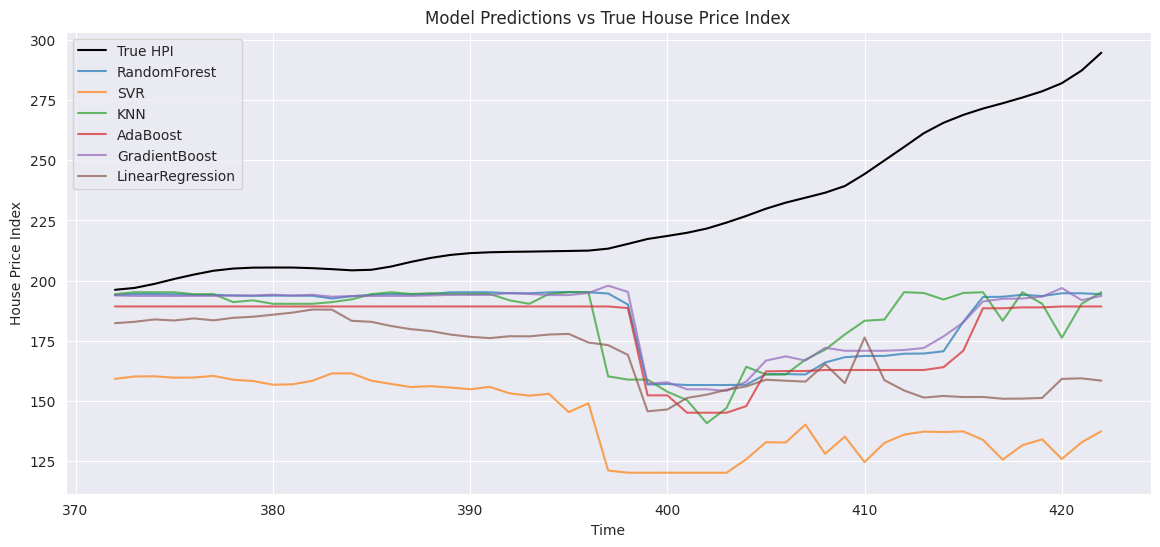

In [169]:
predictions = {
    "RandomForest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn,
    "AdaBoost": y_pred_ada,
    "GradientBoost": y_pred_gb,
    "LinearRegression": y_pred_lr
}

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label="True HPI", color="black")

for name, y_pred in predictions.items():
    plt.plot(y_test.index, y_pred, label=name, alpha=0.7)

plt.title("Model Predictions vs True House Price Index")
plt.xlabel("Time")
plt.ylabel("House Price Index")
plt.legend()
plt.show()

In [159]:
#Validation, train on past data , predict next unseen point, then move forward
def simple_walk_forward(model, X, y, initial_train_size):

    y_true = []
    y_pred = []
    indices = []
    n = len(X)
    for t in range(initial_train_size, n):
        X_tr = X.iloc[:t]
        y_tr = y.iloc[:t]
        X_val = X.iloc[[t]] 
        y_val = y.iloc[t]
        
        # clone model to avoid reusing previous fit:
        mdl = model.__class__(**model.get_params())
        mdl.fit(X_tr, y_tr)
        pred = mdl.predict(X_val)[0]
        
        y_true.append(y_val)
        y_pred.append(pred)
        indices.append(t)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    return {'indices': indices, 'y_true': y_true, 'y_pred': y_pred, 'rmse': rmse, 'r2':r2}

initial_train = int(np.floor(0.6 * len(X)))
rf_res = simple_walk_forward(rf, X, y, initial_train)
ada_res = simple_walk_forward(ada, X, y, initial_train)
lr_res = simple_walk_forward(lr, X, y, initial_train)
knn_res = simple_walk_forward(knn, X, y, initial_train)
gb_res = simple_walk_forward(gradient, X, y, initial_train)
dt_res = simple_walk_forward(dt, X, y, initial_train)
svr_res = simple_walk_forward(svr, X, y, initial_train)

print(f"R² for random forest:   {rf_res['r2']:.4f}")
print(f"RMSE for random forest: {rf_res['rmse']:.4f}")
print(f"R² for adaboost:   {ada_res['r2']:.4f}")
print(f"RMSE for adaboost: {ada_res['rmse']:.4f}")
print(f"R² for linear regression:   {lr_res['r2']:.4f}")
print(f"RMSE for linear regression: {lr_res['rmse']:.4f}")
print(f"R² for KNN:   {knn_res['r2']:.4f}")
print(f"RMSE for KNN: {knn_res['rmse']:.4f}")
print(f"R² for gradient boost:   {gb_res['r2']:.4f}")
print(f"RMSE for gradient boost: {gb_res['rmse']:.4f}")
print(f"R² for decision tree:   {dt_res['r2']:.4f}")
print(f"RMSE for decision tree: {dt_res['rmse']:.4f}")
print(f"R² for svr:   {svr_res['r2']:.4f}")
print(f"RMSE for svr: {svr_res['rmse']:.4f}")

R² for random forest:   0.9560
RMSE for random forest: 7.8073
R² for adaboost:   0.9428
RMSE for adaboost: 8.9025
R² for linear regression:   0.7093
RMSE for linear regression: 20.0764
R² for KNN:   0.7620
RMSE for KNN: 18.1662
R² for gradient boost:   0.9662
RMSE for gradient boost: 6.8434
R² for decision tree:   0.9511
RMSE for decision tree: 8.2341
R² for svr:   -2.2566
RMSE for svr: 67.1929


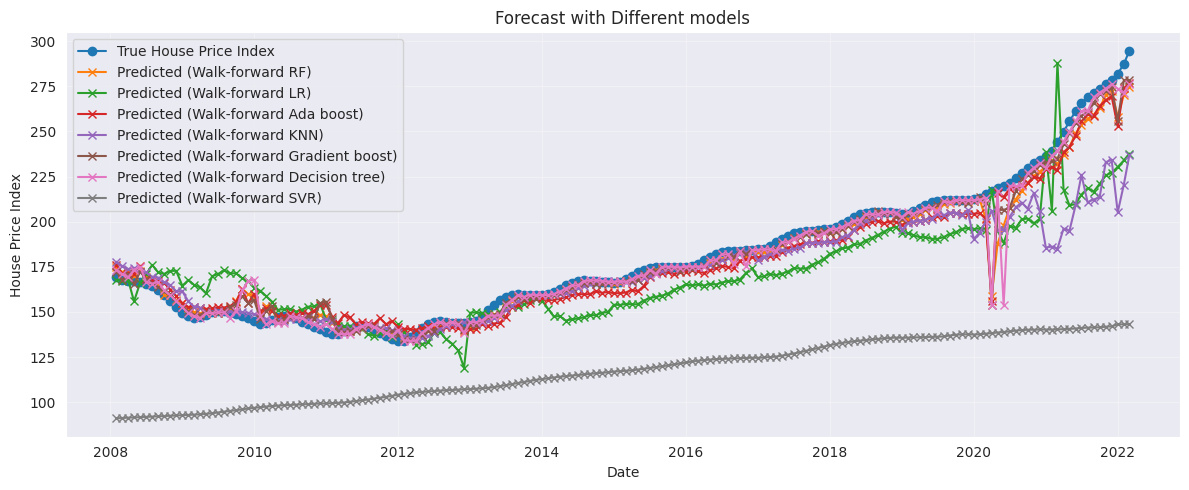

In [170]:
dates = df['Date'].iloc[lr_res['indices']]

plt.figure(figsize=(12,5))
plt.plot(dates, rf_res['y_true'], label='True House Price Index', marker='o')
plt.plot(dates, rf_res['y_pred'], label='Predicted (Walk-forward RF)', marker='x')
plt.plot(dates, lr_res['y_pred'], label='Predicted (Walk-forward LR)', marker='x')
plt.plot(dates, ada_res['y_pred'], label='Predicted (Walk-forward Ada boost)', marker='x')
plt.plot(dates, knn_res['y_pred'], label='Predicted (Walk-forward KNN)', marker='x')
plt.plot(dates, gb_res['y_pred'], label='Predicted (Walk-forward Gradient boost)', marker='x')
plt.plot(dates, dt_res['y_pred'], label='Predicted (Walk-forward Decision tree)', marker='x')
plt.plot(dates, svr_res['y_pred'], label='Predicted (Walk-forward SVR)', marker='x')
plt.title("Forecast with Different models")
plt.xlabel("Date")
plt.ylabel("House Price Index")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()